## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/Users/hahaha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, regularizer, output_units = 10, num_neurons = [256, 128, 64], ratio = 1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0: 
            x = keras.layers.Dense(units = n_units, activation = 'relu', kernel_regularizer = regularizer(ratio))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation = 'relu', kernel_regularizer = regularizer(ratio))(x)
    
    out = keras.layers.Dense(units = output_units, activation = 'softmax')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
RATIO = [1e-2, 1e-4, 1e-8, 1e-12]
REGULAR = [l1, l1_l2]

In [13]:
from itertools import product
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for regular, rat in product(REGULAR, RATIO):
    keras.backend.clear_session()
    print(f"Experiment with regularization = {regular} and ratio = {rat}")
    model = build_mlp(input_shape = x_train.shape[1:], regularizer = regular, ratio = rat)
    model.summary()
    optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov = True, momentum = MOMENTUM)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
    model.fit(x_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (x_test, y_test), shuffle = True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = "exp-ratio-%s-reg-%s" % (str(rat), str(regular))
    results[exp_name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}

Experiment with regularization = <function l1 at 0xb23131730> and ratio = 0.01
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 1000

50000/50000 [==============================] - 5s 94us/step - loss: 2.3788 - accuracy: 0.0978 - val_loss: 2.3788 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.3788 - accuracy: 0.0986 - val_loss: 2.3789 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3788 - accuracy: 0.0979 - val_loss: 2.3788 - val_accuracy: 0.1000
Experiment with regularization = <function l1 at 0xb23131730> and ratio = 0.0001
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
________

50000/50000 [==============================] - 5s 91us/step - loss: 2.0302 - accuracy: 0.6039 - val_loss: 2.2774 - val_accuracy: 0.5196
Epoch 46/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.0082 - accuracy: 0.6048 - val_loss: 2.2821 - val_accuracy: 0.5147
Epoch 47/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.9858 - accuracy: 0.6094 - val_loss: 2.2917 - val_accuracy: 0.5061
Epoch 48/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.9655 - accuracy: 0.6126 - val_loss: 2.2247 - val_accuracy: 0.5197
Epoch 49/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.9448 - accuracy: 0.6112 - val_loss: 2.2062 - val_accuracy: 0.5191
Epoch 50/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9305 - accuracy: 0.6120 - val_loss: 2.1579 - val_accuracy: 0.5323
Experiment with regularization = <function l1 at 0xb23131730> and ratio = 1e-08
Model: "model_1"
__________________________

50000/50000 [==============================] - 6s 111us/step - loss: 1.0756 - accuracy: 0.6193 - val_loss: 1.3583 - val_accuracy: 0.5185
Epoch 43/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.0653 - accuracy: 0.6217 - val_loss: 1.4269 - val_accuracy: 0.5026
Epoch 44/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.0580 - accuracy: 0.6264 - val_loss: 1.3943 - val_accuracy: 0.5183
Epoch 45/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.0423 - accuracy: 0.6312 - val_loss: 1.3700 - val_accuracy: 0.5238
Epoch 46/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.0332 - accuracy: 0.6360 - val_loss: 1.3488 - val_accuracy: 0.5314
Epoch 47/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.0246 - accuracy: 0.6382 - val_loss: 1.4040 - val_accuracy: 0.5138
Epoch 48/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.0191 - accuracy: 0.6393 - val_loss: 1

50000/50000 [==============================] - 5s 100us/step - loss: 1.0996 - accuracy: 0.6125 - val_loss: 1.3602 - val_accuracy: 0.5240
Epoch 40/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.0900 - accuracy: 0.6151 - val_loss: 1.4452 - val_accuracy: 0.4974
Epoch 41/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.0843 - accuracy: 0.6198 - val_loss: 1.3714 - val_accuracy: 0.5219
Epoch 42/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.0734 - accuracy: 0.6220 - val_loss: 1.3731 - val_accuracy: 0.5255
Epoch 43/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.0635 - accuracy: 0.6236 - val_loss: 1.4113 - val_accuracy: 0.5162
Epoch 44/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.0534 - accuracy: 0.6300 - val_loss: 1.3871 - val_accuracy: 0.5124
Epoch 45/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.0470 - accuracy: 0.6318 - val_loss: 1

50000/50000 [==============================] - 5s 95us/step - loss: 2.3784 - accuracy: 0.0976 - val_loss: 2.3784 - val_accuracy: 0.1000ETA: 0s - loss: 2.3784 - accuracy: 0.09 - ETA: 0s - loss: 2.3784 - accuracy: 0.
Epoch 36/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.3784 - accuracy: 0.0982 - val_loss: 2.3784 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.3784 - accuracy: 0.0970 - val_loss: 2.3784 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3784 - accuracy: 0.0989 - val_loss: 2.3783 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.3784 - accuracy: 0.0995 - val_loss: 2.3784 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.3784 - accuracy: 0.0967 - val_loss: 2.3784 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [====================

50000/50000 [==============================] - 5s 105us/step - loss: 1.8306 - accuracy: 0.4525 - val_loss: 1.8974 - val_accuracy: 0.4255
Epoch 33/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8218 - accuracy: 0.4553 - val_loss: 1.8224 - val_accuracy: 0.4552
Epoch 34/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8150 - accuracy: 0.4552 - val_loss: 1.8266 - val_accuracy: 0.4484
Epoch 35/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8082 - accuracy: 0.4569 - val_loss: 1.8251 - val_accuracy: 0.4492
Epoch 36/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.8032 - accuracy: 0.4588 - val_loss: 1.8163 - val_accuracy: 0.4496
Epoch 37/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.7960 - accuracy: 0.4612 - val_loss: 1.8129 - val_accuracy: 0.4513
Epoch 38/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.7929 - accuracy: 0.4612 - val_loss: 1.808

50000/50000 [==============================] - 5s 94us/step - loss: 1.7637 - accuracy: 0.4821 - val_loss: 1.7762 - val_accuracy: 0.4687
Epoch 30/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7468 - accuracy: 0.4838 - val_loss: 1.7709 - val_accuracy: 0.4660
Epoch 31/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.7323 - accuracy: 0.4856 - val_loss: 1.7574 - val_accuracy: 0.4775
Epoch 32/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7185 - accuracy: 0.4871 - val_loss: 1.7521 - val_accuracy: 0.4691
Epoch 33/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.7094 - accuracy: 0.4883 - val_loss: 1.7576 - val_accuracy: 0.4685
Epoch 34/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.6984 - accuracy: 0.4903 - val_loss: 1.7309 - val_accuracy: 0.4800
Epoch 35/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6896 - accuracy: 0.4925 - val_loss: 1.73

Epoch 27/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.7995 - accuracy: 0.4819 - val_loss: 1.8160 - val_accuracy: 0.4672
Epoch 28/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7794 - accuracy: 0.4836 - val_loss: 1.7956 - val_accuracy: 0.4769
Epoch 29/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.7609 - accuracy: 0.4853 - val_loss: 1.7983 - val_accuracy: 0.4644
Epoch 30/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.7443 - accuracy: 0.4863 - val_loss: 1.8023 - val_accuracy: 0.4634
Epoch 31/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7319 - accuracy: 0.4880 - val_loss: 1.7598 - val_accuracy: 0.4783
Epoch 32/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.7187 - accuracy: 0.4904 - val_loss: 1.7549 - val_accuracy: 0.4770
Epoch 33/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7069 - accuracy: 0.4942 - val

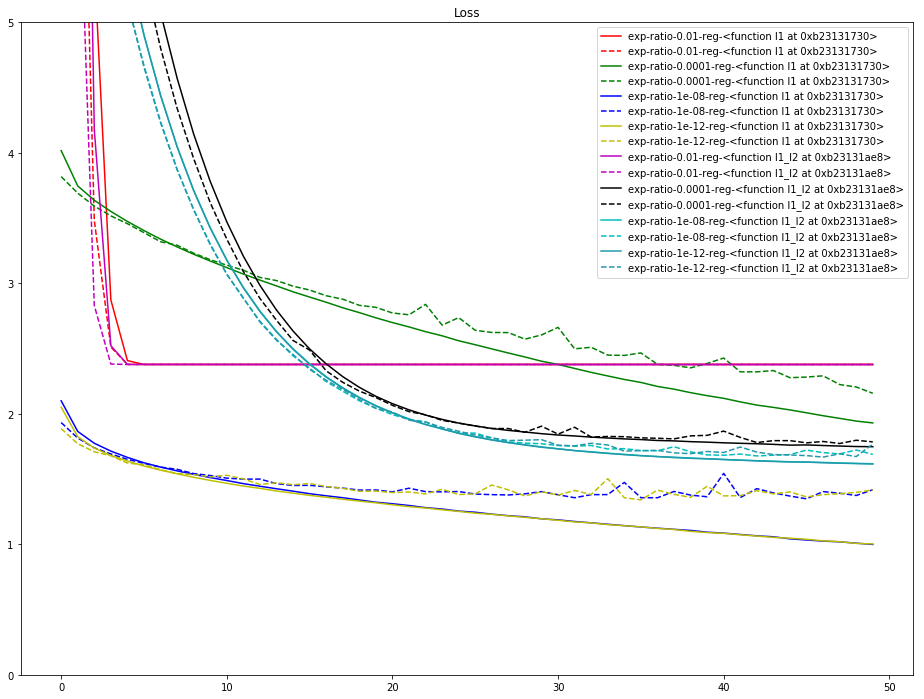

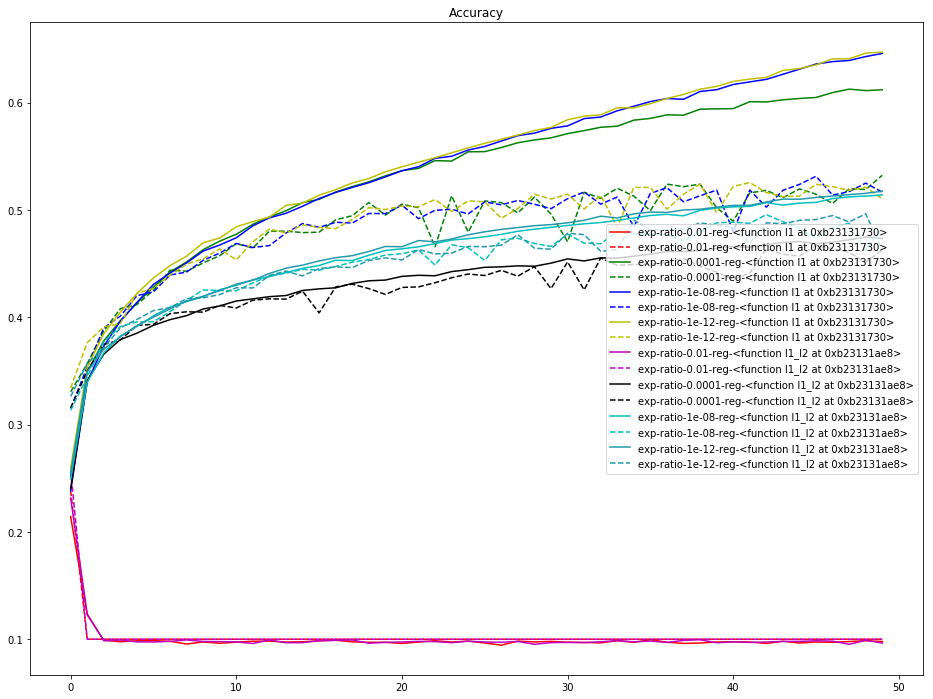

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k", "c", "#2299AA"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()